# Q1
- 전국 시도별 약국수를 구해주세요!
```
상권업종소분류명이 약국인 것을 찾아 빈도수를 구해주세요. 이 때, value_counts, groupby, pivot_table 등 다양한 집계 방법을 통해 구해볼 수 있습니다. 각자 구하기 편한 방법을 통해 빈도수를 구합니다.
다음의 결과가 나오도록 구합니다.
```
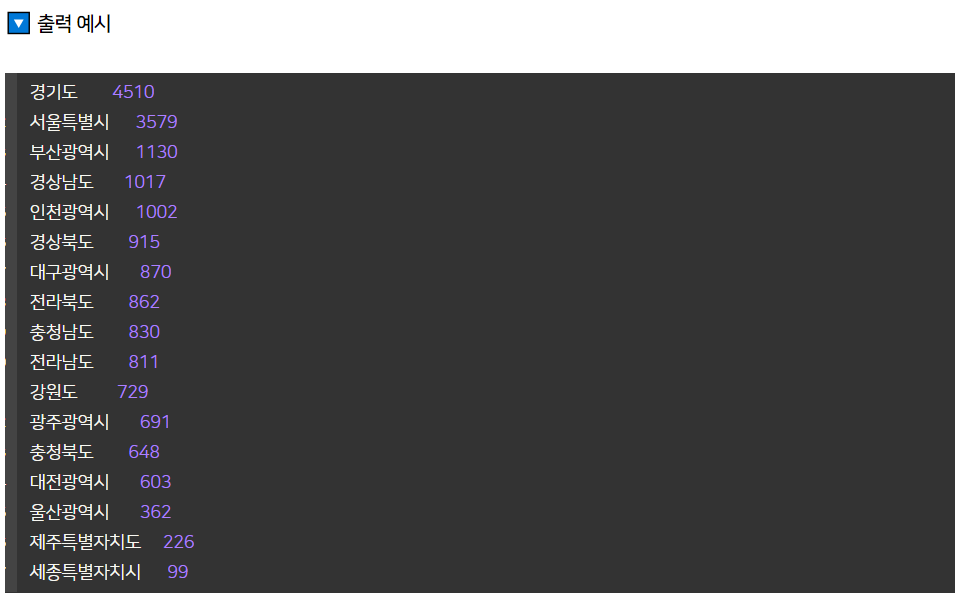

## 데이터 불러오기

In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)

df.shape

(91335, 39)

## 전처리

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

In [6]:
df["상권업종중분류명"].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [7]:
df[df["상권업종중분류명"] == "약국/한약방"]

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
4,20364049,더블유스토어수지점,수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4146510100107120002026238,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,1,NaN,127.095522,37.323528
6,20733252,춘산한약방,NaN,S,의료,S02,약국/한약방,S02A02,한약방,G47811,...,4211010500101000000023668,NaN,강원도 춘천시 낙원길 50,200042.0,24273.0,NaN,2,NaN,127.726905,37.880504
7,20582210,부부탕제원,NaN,S,의료,S02,약국/한약방,S02A03,탕제원,G47859,...,4311112000101870017042942,NaN,충청북도 청주시 상당구 중고개로337번길 134,360802.0,28726.0,NaN,1,NaN,127.499206,36.625355
10,21057519,민생약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4889046030200780002048274,NaN,경상남도 합천군 용주면 월평길 149-35,678912.0,50212.0,NaN,NaN,NaN,128.118615,35.575962
13,21217689,제중당한약방,NaN,S,의료,S02,약국/한약방,S02A02,한약방,G47811,...,4683035023102960000000001,NaN,전라남도 영암군 도포면 인덕길 75-10,526832.0,58429.0,NaN,NaN,NaN,126.630348,34.834080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91312,16131397,큰나무약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4128110600107000011013834,신원당빌딩,경기도 고양시 덕양구 고양대로 1361,412807.0,10464.0,NaN,1,NaN,126.835684,37.655048
91321,16130841,복음약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,2729012400102760000029818,그린맨션3차아파트,대구광역시 달서구 구마로36길 33,704752.0,42735.0,301,NaN,105,128.547352,35.836250
91322,16091491,설연화한복감성약방,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,1126010400101740001009985,NaN,서울특별시 중랑구 공릉로 28,131848.0,2034.0,NaN,NaN,NaN,127.078082,37.613194
91324,16109731,위례수약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4113110800101810002000002,NaN,경기도 성남시 수정구 위례서일로 18,461210.0,13647.0,NaN,1,NaN,127.137870,37.465260


In [9]:
df.loc[df["상권업종중분류명"] == "약국/한약방", "상권업종소분류명"].unique()

array(['약국', '한약방', '탕제원'], dtype=object)

## value_counts()

In [15]:
df.loc[df["상권업종소분류명"] == "약국", "시도명"].value_counts()

경기도        4510
서울특별시      3579
부산광역시      1130
경상남도       1017
인천광역시      1002
경상북도        915
대구광역시       870
전라북도        862
충청남도        830
전라남도        811
강원도         729
광주광역시       691
충청북도        648
대전광역시       603
울산광역시       362
제주특별자치도     226
세종특별자치시      99
Name: 시도명, dtype: int64

## groupby()

In [36]:
df[df["상권업종소분류명"] == "약국"][["시도명"]].groupby("시도명")["시도명"].count().sort_values(ascending=False)

시도명
경기도        4510
서울특별시      3579
부산광역시      1130
경상남도       1017
인천광역시      1002
경상북도        915
대구광역시       870
전라북도        862
충청남도        830
전라남도        811
강원도         729
광주광역시       691
충청북도        648
대전광역시       603
울산광역시       362
제주특별자치도     226
세종특별자치시      99
Name: 시도명, dtype: int64

# Q2
- 여러분은 반려동물과 관련된 사업을 하는 스타트업에 취업을 하여 상권분석을 해달라는 요청을 받았습니다. 병원이나 약국은 인구나 유동인구가 많은 지역에 주로 위치하고 있습니다. 그렇다면 동물병원도 병원이나 약국이 많은 곳에 더 많이 있을까요?
```
빈도수를 구하고 시각화 하여 동물병원이 어느 지역에 많은지 분석해 주세요!
다음의 결과가 나오도록 구합니다.
```
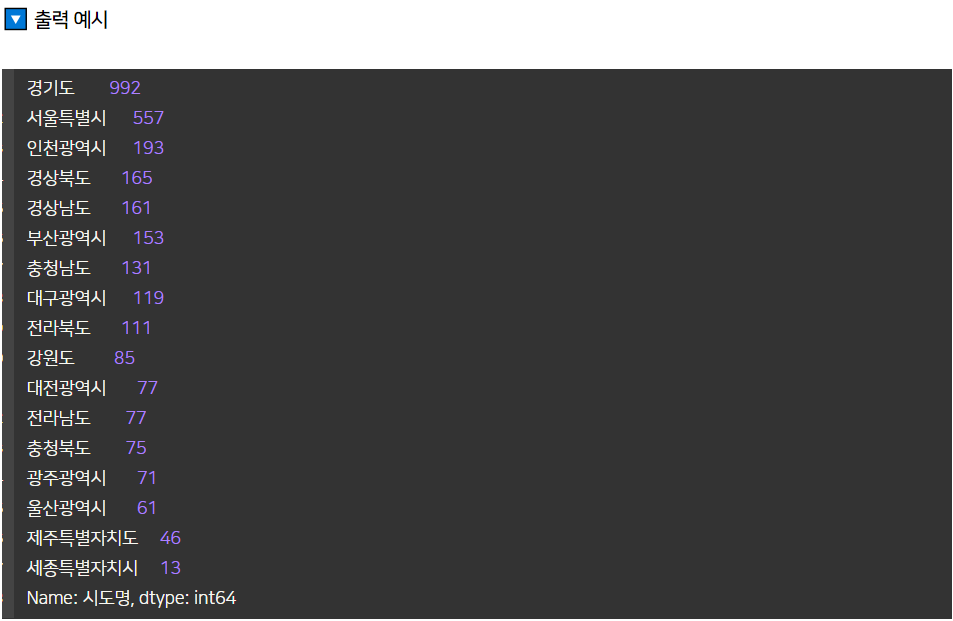

## 전처리

In [44]:
df["상권업종중분류명"].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [45]:
df.loc[df["상권업종중분류명"] == "수의업", "상권업종소분류명"].unique()

array(['동물병원', '수의업-종합', '수의업-기타'], dtype=object)

In [52]:
df_animal = df[df["상권업종소분류명"] == "동물병원"]

df_animal = 

In [53]:
df.loc[df["상권업종소분류명"] == "동물병원", "시도명"].value_counts()

경기도        992
서울특별시      557
인천광역시      193
경상북도       165
경상남도       161
부산광역시      153
충청남도       131
대구광역시      119
전라북도       111
강원도         85
대전광역시       77
전라남도        77
충청북도        75
광주광역시       71
울산광역시       61
제주특별자치도     46
세종특별자치시     13
Name: 시도명, dtype: int64

## 시각화

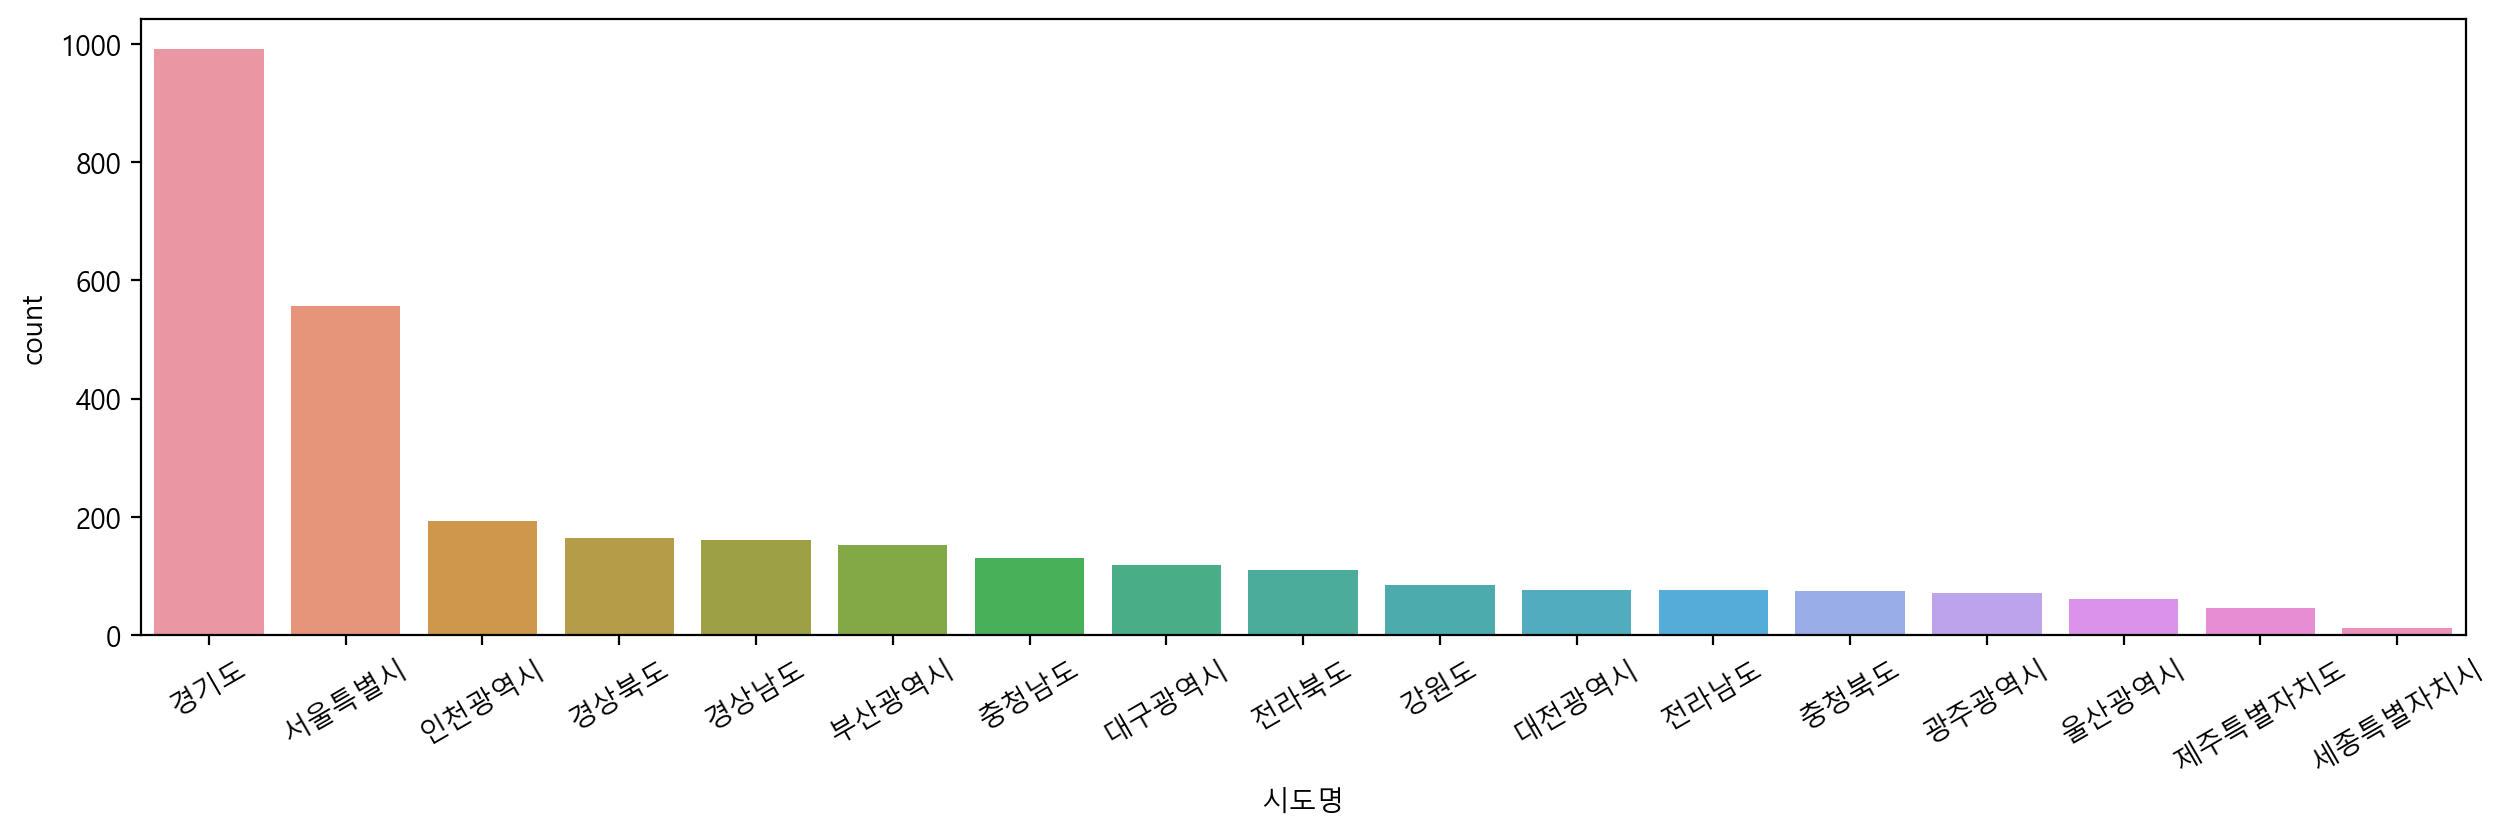

In [65]:
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
import seaborn as sns

plt.rc('font', family="Malgun Gothic")
plt.rc('axes', unicode_minus=False)

# 그래프가 노트북 안에 보이게 설정
%matplotlib inline

# 폰트 선명하게 보이게 설정
set_matplotlib_formats('retina')

plt.figure(figsize=(15, 4))

sns.countplot(data=df_animal, x = "시도명",
             order=df.loc[df["상권업종소분류명"] == "동물병원", "시도명"].value_counts().index)

plt.xticks(rotation=30)

plt.show()

# Q3
- 강남지역에는 다른 지역에 비해 피부과나 성형외과가 많아 보입니다. 실제로 해당 지역에 피부과나 성형외과가 다른 지역에 비해 전체 병원 수 중에서 어느 정도의 비율을 차지하고 있는지 알아보겠습니다.
    - 서울에 소재한 병원 중 상권업종소분류명에 "피부" 나 "성형"이 들어간 분류명을 찾아 구해주세요!
    - 피부과 성형외과 수 / 전체병원 수 로 비율을 구해주세요!
    - 비율이 높은 순서대로 정렬되게 구해주세요!
    - 수업에서 사용한 같은 CSV 파일을 사용하며 다음의 결과가 나오도록 구합니다.
    - 소숫점 두 번째짜리까지 출력하는 방법은 pandas round 로 검색해서 사용법을 알아보세요!
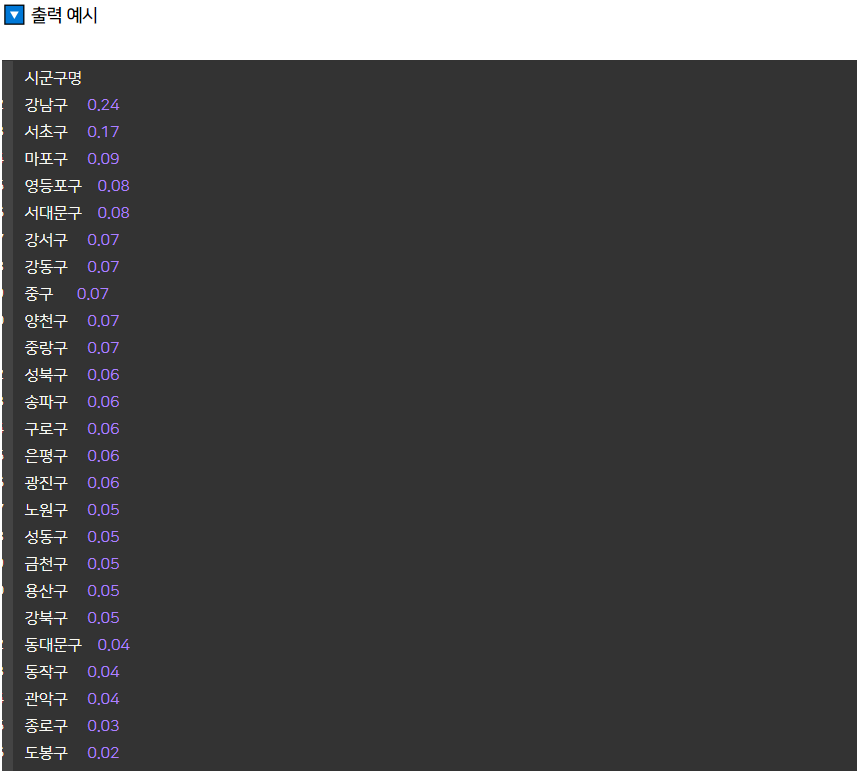

## 데이터 로딩

In [2]:
df = pd.read_csv("./data/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv", low_memory=False)

df.shape

(91335, 39)

## 서울에 소재한 병원 중 상권업종소분류명에 "피부" 나 "성형"이 들어간 분류명 찾기

In [4]:
df_seoul = df[(df["상권업종중분류명"] == "병원") & (df["시도명"] == "서울특별시")].copy()

df_seoul.shape

(13406, 39)

In [131]:
# 피부과, 정형/성형외과
df_seoul["상권업종소분류명"].unique()

array(['내과/외과', '정형/성형외과', '소아과', '약국', '한의원', '치과의원', '일반병원', '기타병원',
       '침구원', '이비인후과의원', '동물병원', '척추교정치료', '피부과', '산부인과', '한약방', '종합병원',
       '탕제원', '산후조리원', '노인/치매병원', '한방병원', '언어치료', '응급구조대', '치과병원', '혈액원',
       '안과의원', '신경외과', '비뇨기과', '유사의료업기타', '치과기공소', '수의업-종합', '접골원', '조산원',
       '수의업-기타'], dtype=object)

In [5]:
df_seoul_filtered = df_seoul[df_seoul["상권업종소분류명"].str.contains("피부|성형")]

df_seoul_filtered.shape

(1373, 39)

In [6]:
df_seoul[df_seoul["상권업종소분류명"].isin(["피부과", "정형/성형외과"])].shape

(1373, 39)

## 행정구별 피부과 성형외과 수 / 전체병원 수 비율 구하기

In [7]:
# 전체병원 수
df_seoul_total = df_seoul["시군구명"].value_counts()

df_seoul_total

강남구     2550
서초구     1196
송파구      748
동대문구     644
광진구      600
강서구      579
영등포구     516
은평구      506
노원구      503
강동구      494
성북구      470
마포구      456
중구       423
양천구      398
관악구      395
서대문구     379
종로구      343
동작구      342
성동구      339
중랑구      307
구로구      289
도봉구      275
강북구      259
용산구      222
금천구      173
Name: 시군구명, dtype: int64

In [8]:
# 피부 or 성형
df_seoul_filtered_total = df_seoul_filtered["시군구명"].value_counts()

df_seoul_filtered_total

강남구     603
서초구     200
송파구      48
마포구      40
영등포구     39
강서구      38
광진구      37
강동구      37
중구       31
은평구      31
서대문구     29
성북구      28
동대문구     27
양천구      26
노원구      26
중랑구      21
성동구      17
구로구      17
관악구      17
동작구      14
강북구      12
종로구      11
용산구      10
금천구       9
도봉구       5
Name: 시군구명, dtype: int64

In [9]:
temp = pd.DataFrame([df_seoul_total, df_seoul_filtered_total],
             index=["전체", "피부 or 성형"]).T

temp["비율"] = temp["피부 or 성형"] / temp["전체"]

temp

,전체,피부 or 성형,비율
강남구,2550,603,0.236471
서초구,1196,200,0.167224
송파구,748,48,0.064171
동대문구,644,27,0.041925
광진구,600,37,0.061667
강서구,579,38,0.065630
영등포구,516,39,0.075581
은평구,506,31,0.061265
노원구,503,26,0.051690
강동구,494,37,0.074899


## 비율이 높은 순서대로 소수점 두자리까지 출력

In [10]:
temp.sort_values("비율", ascending=False).round(2)

,전체,피부 or 성형,비율
강남구,2550,603,0.24
서초구,1196,200,0.17
마포구,456,40,0.09
서대문구,379,29,0.08
영등포구,516,39,0.08
강동구,494,37,0.07
중구,423,31,0.07
중랑구,307,21,0.07
강서구,579,38,0.07
양천구,398,26,0.07


# Q4
- 평균 기대수명이 점점 길어지면서 실버 의료 산업도 주목받고 있습니다. 여러분은 실버 의료 산업과 관련된 스타트업에 취업했습니다. 지도를 시각화하여 '노인/치매병원'이 주로 어디에 위치하고 있는지를 찾아보고자 합니다.
    - folium 을 통해 지도에 전국의 '노인/치매병원'을 표시해 주세요!
    - 다음과 같이 시각화 하며, folium 의 문서를 참고하여 다른 기능을 사용하여 좀 더 멋지게 지도를 꾸며도 좋습니다.
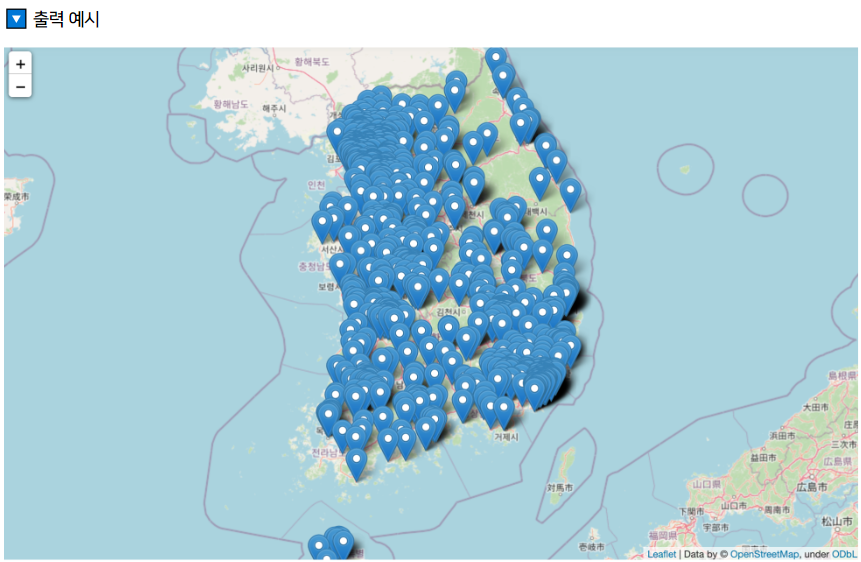

In [14]:
df["상권업종소분류명"].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [17]:
df_senior = df[df["상권업종소분류명"] == "노인/치매병원"]

df_senior

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
21,21128898,다사랑요양병원,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,2632010300101360002000001,다사랑요양병원,부산광역시 북구 덕천로 339,616110.0,46610.0,NaN,1,NaN,129.040773,35.209154
62,21511155,노경회,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,4623035023110240001000001,NaN,전라남도 광양시 진월면 용소길 7,545851.0,57713.0,NaN,1,NaN,127.746981,34.986585
69,21406385,일산카네이션너싱홈,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,4128510200115610001011448,해태쇼핑타운,경기도 고양시 일산동구 중산로 241,410831.0,10336.0,NaN,3,NaN,126.780122,37.693689
79,21403242,은성복지회,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,4615010800200220000080503,향림실버빌,전라남도 순천시 조비길 298,540950.0,57922.0,NaN,NaN,NaN,127.460606,34.991014
107,21722929,하은실버홈,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,4725033022107880000027997,NaN,경상북도 상주시 낙동면 영남제일로 125-17,742951.0,37251.0,NaN,2,NaN,128.295524,36.365132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91184,16311246,유성재단유성요양병원,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,4833010400104910005003855,외한은행,경상남도 양산시 삼일로 75,626800.0,50619.0,NaN,NaN,NaN,129.035645,35.343927
91216,16122998,실로암요양병원매점,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,4514012200102240004078939,실로암사랑병원,전라북도 익산시 선화로 389,570979.0,54629.0,NaN,NaN,NaN,126.973450,35.946242
91253,16108794,한사랑요양병원,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,2917011500109670002002194,NaN,광주광역시 북구 서하로 244,500838.0,61130.0,NaN,NaN,NaN,126.907230,35.186972
91328,16198812,서울플러스,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,4420025328105080000002698,배방자이1차아파트,충청남도 아산시 배방읍 호서로 460,336729.0,31495.0,NaN,2,NaN,127.083401,36.768332


In [21]:
import folium

m = folium.Map(
    location=[df_senior["위도"].mean(), df_senior["경도"].mean()],
    zoom_start=7)

for n in df_senior.index:
    name  = df_senior.loc[n, "상호명"]
    address = df_senior.loc[n, "도로명주소"]
    popup = f"{name} - {address}"
    location = [df_senior.loc[n, "위도"], df_senior.loc[n, "경도"]]
    
    folium.Marker(
        location=location,
        popup=popup
    ).add_to(m)
    
m